<a href="https://colab.research.google.com/github/subhanreddy/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb was born in 2007 when two Hosts welcomed three guests to their San Francisco home, and has since grown to over 4 million Hosts who have welcomed more than 1 billion guest arrivals in almost every country across the globe. 

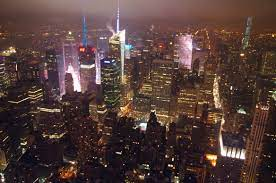

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.




Explore and analyze the data to discover key understandings (not limited to these) such as :




1.What can we learn about different hosts and areas?


2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3. what is 	Handling Missing Values ?

4. How many 	Univariate words ?


5. what is 	Bivariate Analysis: Cross Tabulation ?











In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 2019 NYC Airbnb **Data**

In [ ]:
path = '/content/drive/My Drive/'

In [ ]:
data = pd.read_csv('/Airbnb NYC 2019.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
data.shape

(48895, 16)

In [ ]:
data.drop('id', axis = 1, inplace= True)
data.drop('host_name', axis = 1, inplace = True)
data.drop('calculated_host_listings_count', axis=1, inplace=True)
data.drop('last_review', axis = 1, inplace =True)

#Renaming columns
data = data.rename(columns={'neighbourhood_group': 'borough',
                            'neighbourhood': 'neighborhood',
                            'listing_price': 'price'})
data.columns

Index(['name', 'host_id', 'borough', 'neighborhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365'],
      dtype='object')

What can we learn about different hosts and areas?

In [ ]:
new_data = data[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
hosts_areas = new_data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
areas_reviews = new_data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


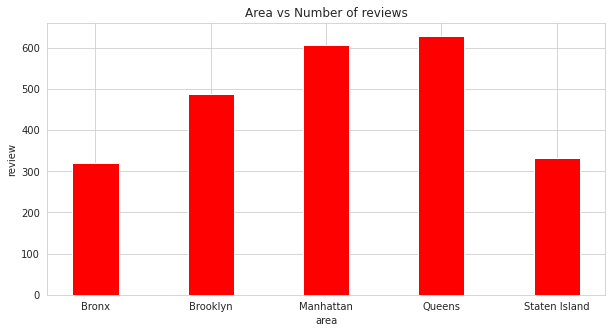

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='red',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = new_data.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


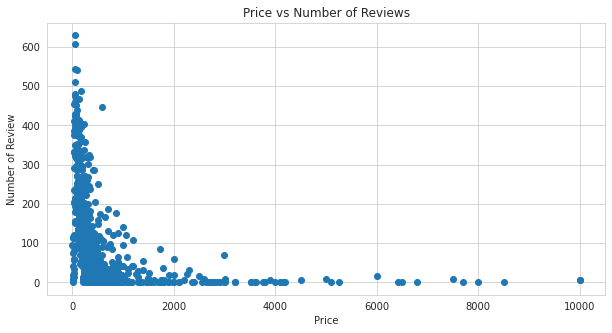

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

Handling Missing **Values**

In [ ]:
missing_values_count = np.sum(data.isnull())
missing_values_count

name                    16
host_id                  0
borough                  0
neighborhood             0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month    10052
availability_365         0
dtype: int64

In [ ]:
data['reviews_per_month'] = data.reviews_per_month.fillna(data.reviews_per_month.median())

In [ ]:
total_cells = np.product(data.shape)
total_missing =  missing_values_count.sum()


In [ ]:
percentage_missing = np.round((total_missing / total_cells) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing) 

Percentage of missing values in the dataset: 1.72


In [ ]:
cleaned_df = data.dropna(axis = 0, how ='any') #Dropping Rows with at least 1 null value
print(len(data) - len(cleaned_df ), 'rows were dropped with missing values.') 

16 rows were dropped with missing values.


In [ ]:
np.sum(cleaned_df.isnull()) 

name                 0
host_id              0
borough              0
neighborhood         0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

In [ ]:
df = cleaned_df[cleaned_df['price'] != 0]

In [ ]:
df.head()

,name,host_id,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


# **Outliers**

In [ ]:
q25, q75 = np.percentile(cleaned_df.price, 25), np.percentile(cleaned_df.price, 75)
iqr = q75 - q25


In [ ]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=69.000, 75th=175.000, IQR=106.000


In [ ]:
outliers = [x for x in cleaned_df.price if x < lower or x > upper]
print('Outliers observations:',len(outliers))

Outliers observations: 2971


In [ ]:
non_outliers = [x for x in cleaned_df.price if x >= lower and x <= upper]
print('Non-outlier observations:', len(non_outliers))

Non-outlier observations: 45908


# **Distribution**

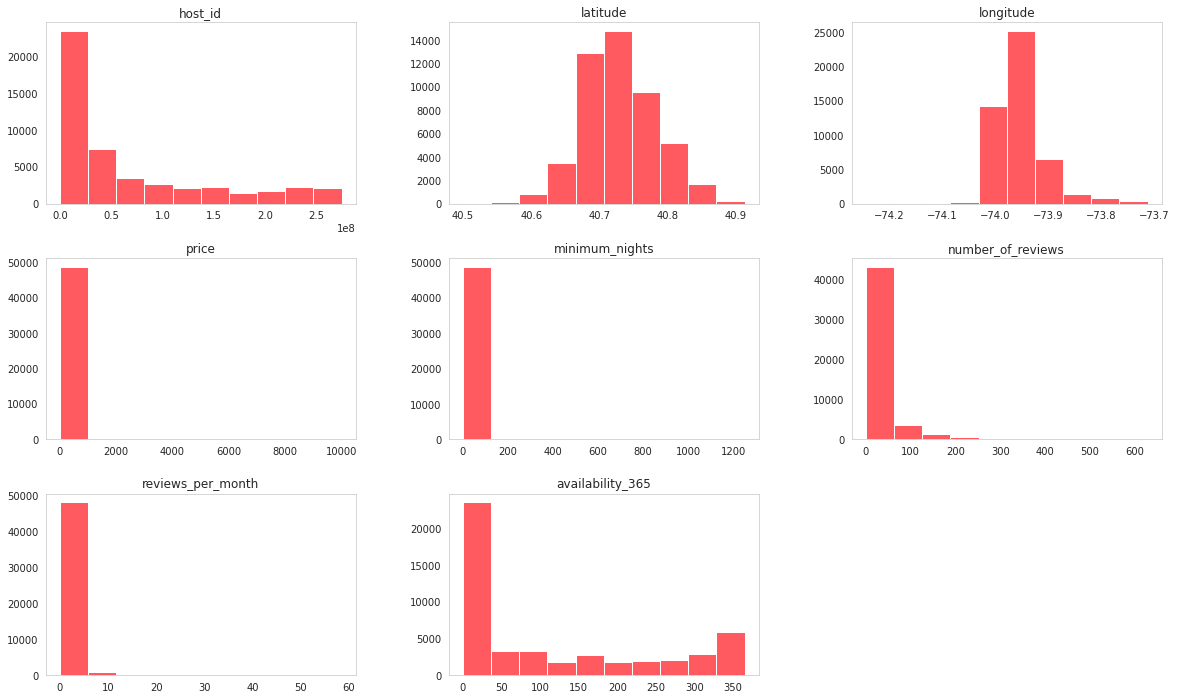

In [ ]:
_ = df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

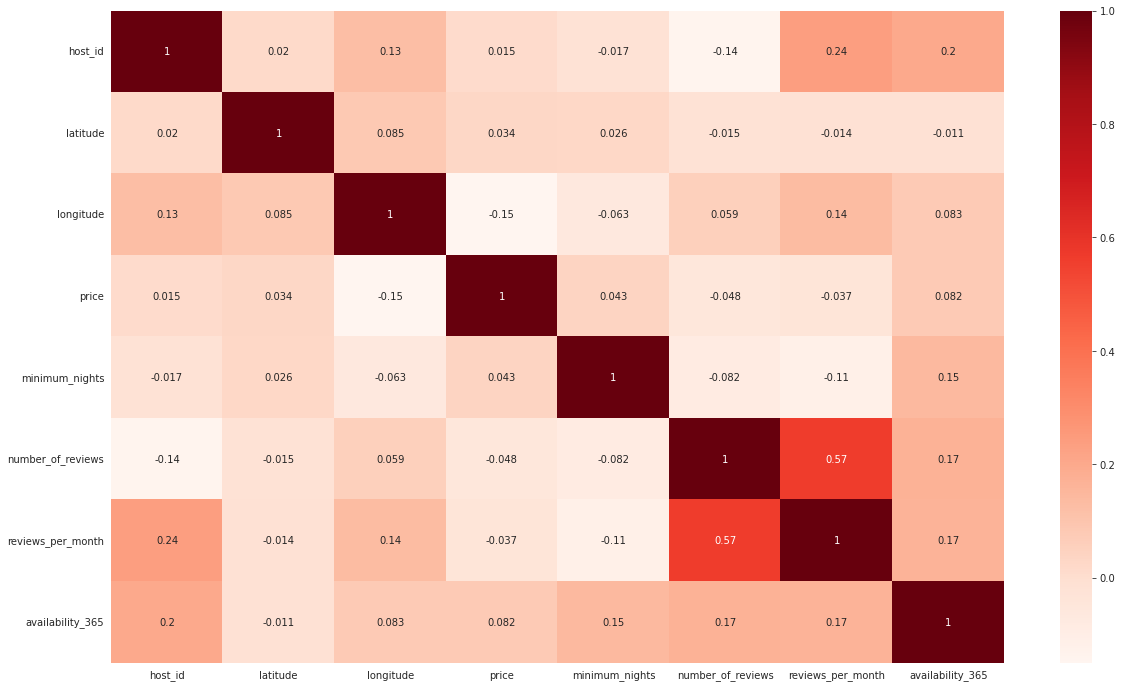

In [ ]:
plt.figure(figsize=(20,12))


abnb_corr = df.corr()
_ = sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Reds")

# Univariate **Analysis** 

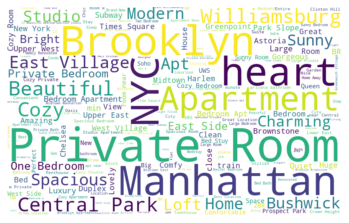

In [ ]:
from wordcloud import WordCloud

text = ' '.join([text for text in df['name']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(str(text))



plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [ ]:
print('There are {} words in the listing description.'.format(len(text)))

There are 1852579 words in the listing description.


# Bivariate Analysis: Cross **Tabulation**

In [ ]:
median_listing_price = df.groupby('borough')['price'].agg('median').sort_values(ascending = False)
np.round(median_listing_price, 2)


borough
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

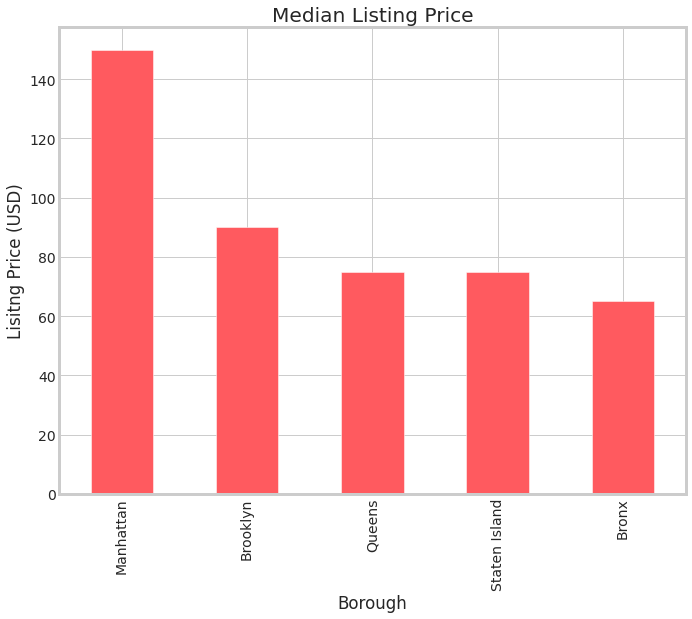

In [ ]:
median_listing_price.plot(kind='bar', title = "Median Listing Price", figsize=(10,8), color = '#FF5A5F')
_ = plt.xlabel('Borough')
_ = plt.ylabel('Lisitng Price (USD)')

In [ ]:
listings_boroughs = df.groupby('borough')['name'].count().sort_values(ascending = False)
listings_boroughs

borough
Manhattan        21651
Brooklyn         20089
Queens            5666
Bronx             1089
Staten Island      373
Name: name, dtype: int64

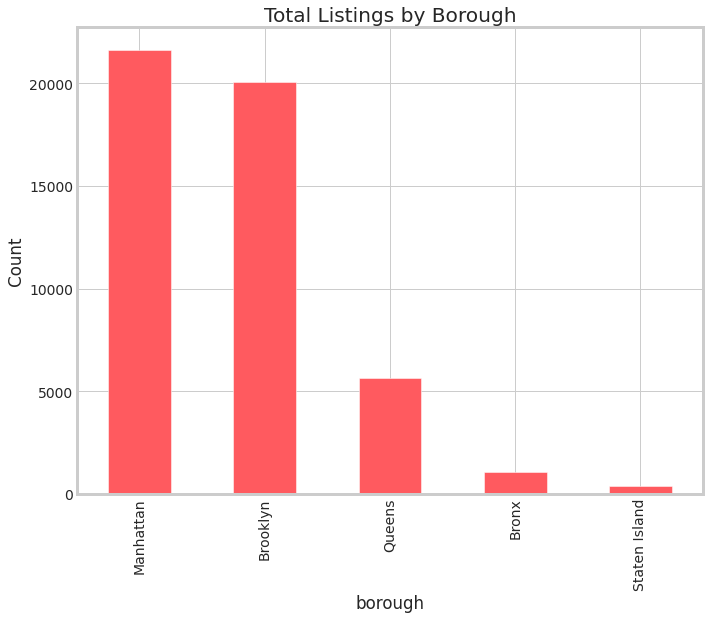

In [ ]:
listings_boroughs.plot(kind = 'bar', title = 'Total Listings by Borough',  figsize=(10,8), color = '#FF5A5F')
_ = plt.ylabel('Count')

In [ ]:
median_price_room_type = df.groupby('room_type')['price'].agg('median').sort_values(ascending = False)
np.round(median_price_room_type,2)

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

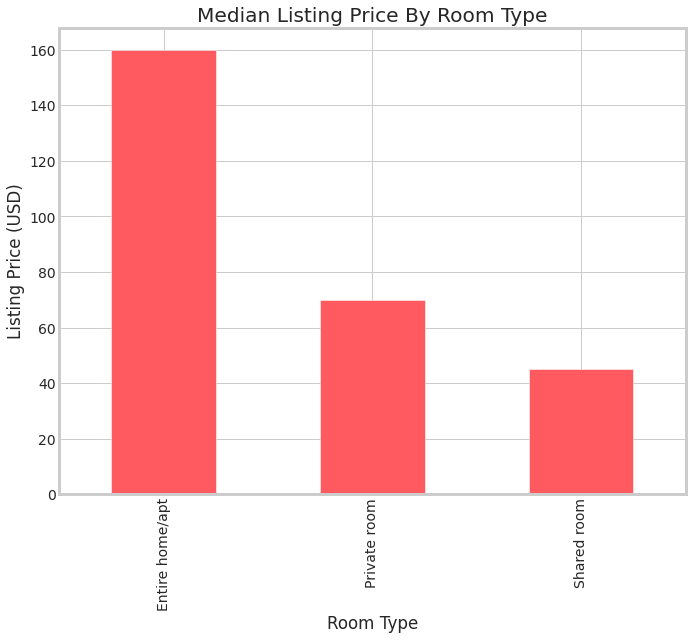

In [ ]:
median_price_room_type.plot(kind = 'bar', title = 'Median Listing Price By Room Type', figsize=(10,8), color = '#FF5A5F')
_ = plt.xlabel('Room Type')
_ = plt.ylabel('Listing Price (USD)')

In [ ]:
reviews_room_type = df.groupby('room_type')['number_of_reviews'].agg('count')
reviews_room_type

room_type
Entire home/apt    25400
Private room       22311
Shared room         1157
Name: number_of_reviews, dtype: int64

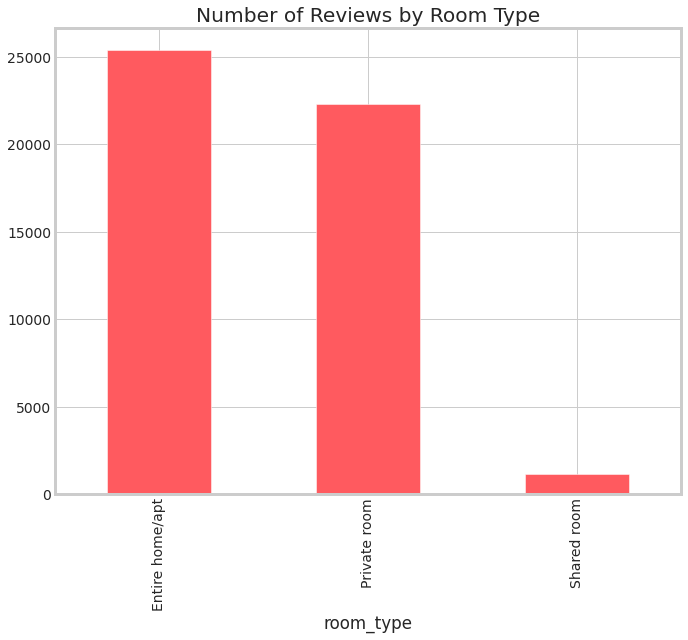

In [ ]:
_ = reviews_room_type .plot(kind = 'bar', title = 'Number of Reviews by Room Type',figsize=(10,8), color = '#FF5A5F')

In [ ]:
top_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighborhood
Financial District    200.0
West Village          200.0
Midtown               210.0
Flatiron District     225.0
Willowbrook           249.0
NoHo                  250.0
Neponsit              274.0
Tribeca               295.0
Woodrow               700.0
Fort Wadsworth        800.0
Name: price, dtype: float64

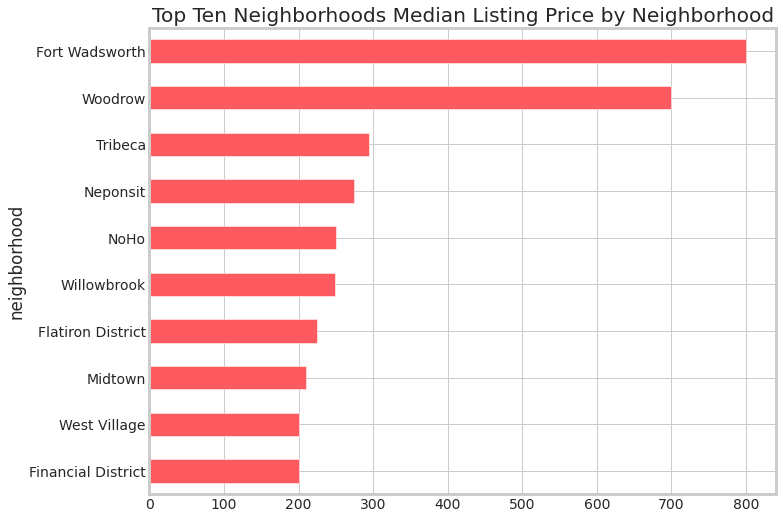

In [ ]:
_ = top_ten_neighborhoods.plot(kind = 'barh', title = 'Top Ten Neighborhoods Median Listing Price by Neighborhood', figsize=(10,8), color = '#FF5A5F')


In [ ]:
bottom_ten_neighborhoods = df.groupby('neighborhood')['price'].agg('median').nsmallest(n=10).sort_values(ascending = True)
bottom_ten_neighborhoods

neighborhood
Concord           34.5
Castle Hill       39.0
Corona            40.0
Hunts Point       40.0
New Dorp Beach    40.0
Tremont           41.0
Bull's Head       45.0
Mount Eden        45.5
Soundview         49.0
Whitestone        49.0
Name: price, dtype: float64

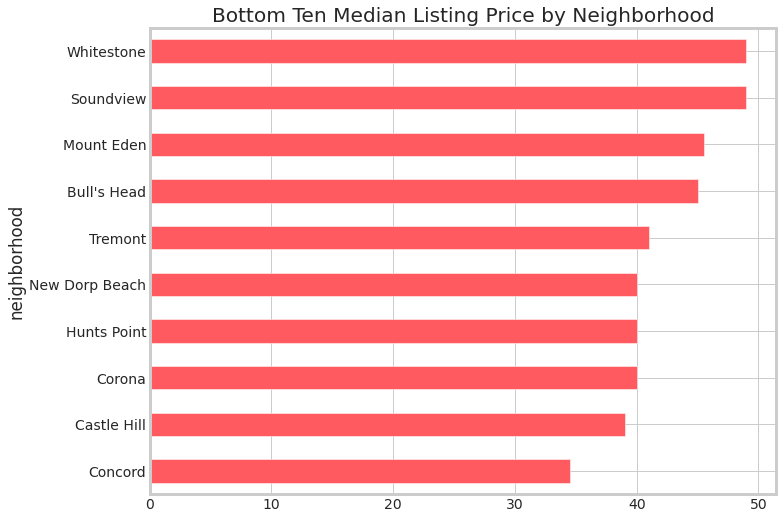

In [ ]:
_ = bottom_ten_neighborhoods.plot(kind = 'barh', title = 'Bottom Ten Median Listing Price by Neighborhood', figsize=(10,8), color = '#FF5A5F')

# Geospatial **Visualization**

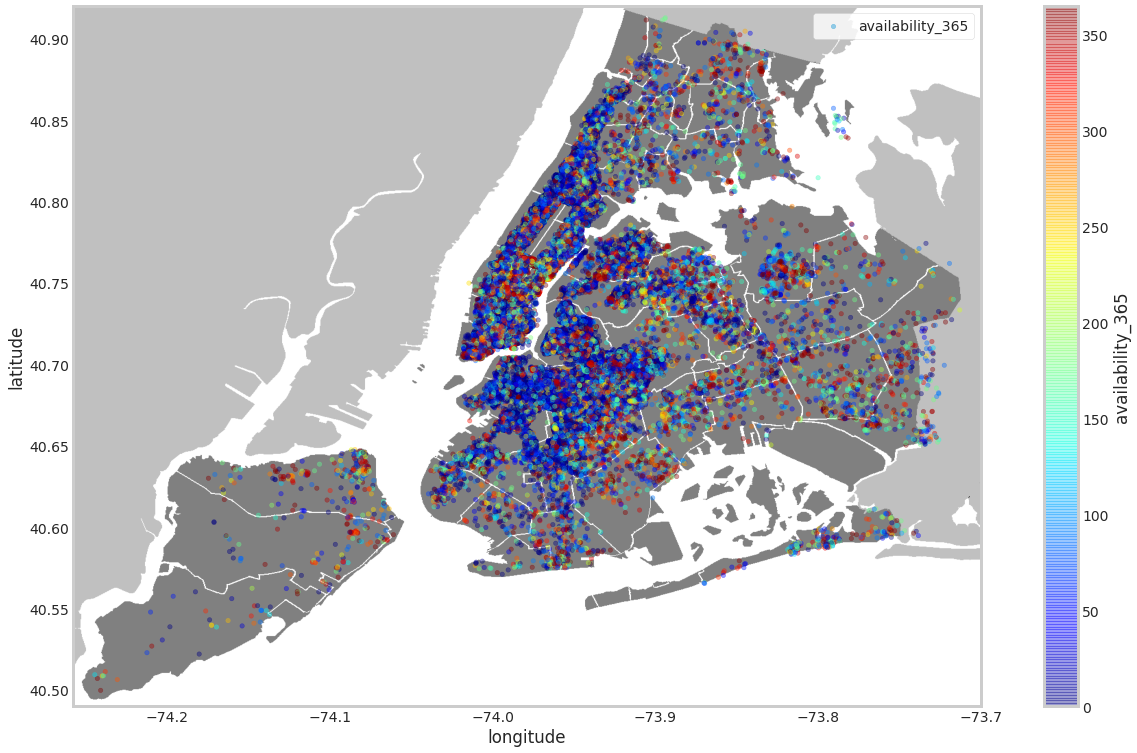

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(20,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

fig = df.plot(kind = 'scatter', x="longitude", y="latitude", label='availability_365', c = 'availability_365',
        ax = ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12), grid = False)


plt.legend()
plt.show()

Conclusion:


1.

There were several outliers; Because the listing price is arbitrary, I kept the outliers, since the price is not due to error, but the host's decision.


2.
Some of the numerical values were positively skewed; Therefore, for the analysis, I chose to focus on the median values, because it is less susceptible to skewed data.


3.
Entire apartments, unsurprisingly, cost more and had more reviews compared to other room types 





4.
Manhattan and Brooklyn significantly had more listings than the other boroughs





5.
Lastly, there were several listings in the Bronx that appeared in the bottom ten neighborhoods. Ultimately, location matters, one could argue, for Airbnb listings, but there can be several factors that may contribute such as crime statistics, etc. 







